In [37]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import auc, precision_recall_curve,classification_report
import seaborn as sns

In [38]:
d = pd.read_csv('C:/Users/Ankush Negi/Desktop/Video Anomaly Detection in Road Accidents/CSV/Gray.csv',index_col=0)

In [39]:
d.loc[d['Class'] == 1, 'Class'] = -1
d.loc[d['Class'] == 0, 'Class'] = 1

display(d.head())
display(d.tail())


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.091337,0.116164,0.082682,0.065471,0.040325,0.034460,0.041812,0.028746,0.038376,0.118293,...,0.037472,0.016945,0.030078,0.479320,0.269376,0.093853,0.070431,0.076576,0.078034,1
1,0.339148,0.426073,0.424330,0.343873,0.400055,0.398434,0.229129,0.242470,0.244308,0.209226,...,0.220796,0.224576,0.215038,0.294615,0.231862,0.194865,0.235808,0.202895,0.188064,1
2,1.169620,1.149726,1.283289,1.330018,1.377478,1.384790,1.273399,1.167964,1.199596,1.282005,...,1.133217,0.803359,0.716273,0.977331,1.306488,0.970416,0.732468,0.819460,1.175146,1
3,0.678514,0.550748,1.211692,1.164041,0.591498,0.268360,0.262265,0.786680,0.841955,0.203932,...,0.207253,0.043071,0.027644,0.729377,0.760799,0.590914,0.145336,0.130083,0.101409,1
4,0.814380,0.860416,0.717146,0.605213,0.522557,0.419437,0.322370,0.348295,0.648754,0.534378,...,0.414965,0.420689,0.430630,0.549334,0.708087,0.599063,0.549627,0.393857,0.356781,1


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
294,0.320677,0.243031,0.228659,0.265840,0.526511,0.802324,1.031532,1.402557,1.334139,1.226592,...,0.987362,0.925150,1.028988,1.294755,1.684587,1.150668,0.937209,0.972849,1.099599,-1
295,0.612284,0.566454,1.011721,1.827481,2.037992,1.079262,1.007978,1.989644,1.759025,1.786371,...,1.175516,0.663550,0.742254,1.462140,0.462810,0.311963,0.456979,0.367987,0.389498,-1
296,0.389459,0.117005,0.106356,0.952649,0.209486,0.180530,0.160460,0.156249,0.141826,0.080684,...,0.287651,0.094972,0.115977,0.679625,0.231351,0.233478,0.522806,0.314802,0.894134,-1
297,0.614251,0.268827,0.284586,0.584616,0.484137,0.311856,0.234379,0.232866,0.442995,0.666605,...,0.890710,0.592504,0.352978,0.491882,0.580451,0.574803,0.678889,0.479505,0.454754,-1
298,1.012289,1.197932,1.523422,1.767296,2.570654,2.990361,3.049420,2.683003,2.504268,2.685986,...,2.096558,1.776842,1.817100,2.717361,2.185007,2.034202,2.000898,1.898514,1.974373,-1


In [40]:
data = d
mask = (data['Class'] == 1)

if data[mask].shape[0] == 0:
    raise ValueError("No samples found with class equal to 1.")

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=2)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)
std=MinMaxScaler()
X_train=std.fit_transform(X_train)
x_test=std.transform(x_test)

C:\Users\Ankush Negi\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [41]:
# max_score = 0
# for i in np.arange(0.1, 1.0, 0.1):
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  
y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal
fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   
precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)
score_svc = metrics.accuracy_score(y_test,y_pred)
# if max_score<score_svc:
#     max_score = score_svc
#     yy_test = y_test
#     yy_pred = y_pred
#     auc_svc = auc_svc1
#     pr_auc = pr_auc1
#     fpr,tpr = fprr,tprr
#     precision = precision1
#     recall = recall1
print(score_svc)

print(classification_report(y_test, y_pred))

0.7163120567375887
              precision    recall  f1-score   support

          -1       0.77      0.87      0.81       101
           1       0.50      0.33      0.39        40

    accuracy                           0.72       141
   macro avg       0.63      0.60      0.60       141
weighted avg       0.69      0.72      0.70       141



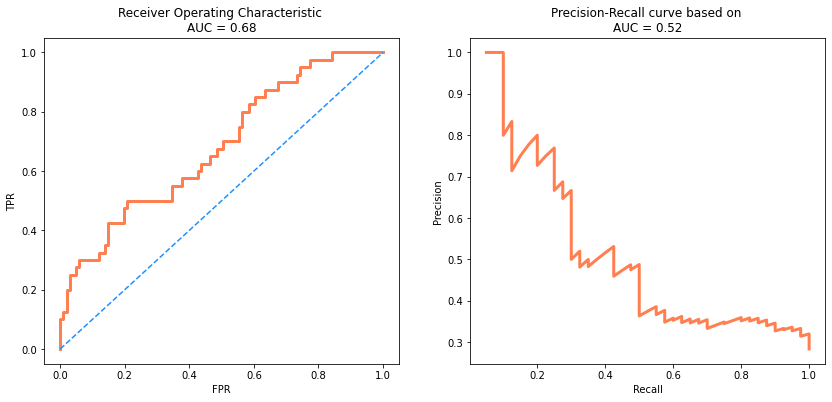

In [42]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()


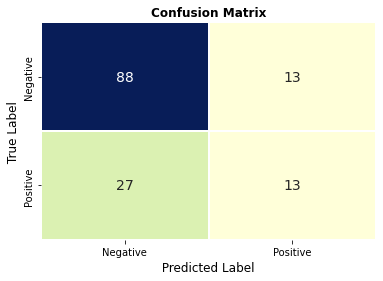

In [43]:
# Create the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="YlGnBu", annot_kws={"fontsize":14}, cbar=False, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], linewidths=0.1)

# Add labels and title to the plot
plt.title("Confusion Matrix", fontweight="bold")
plt.xlabel(" Predicted Label ", fontsize=12)
plt.ylabel(" True Label ", fontsize=12)

# Show the plot
plt.show()